In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline

In [36]:
df = pd.read_csv('AppleStore.csv')
df.head()

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


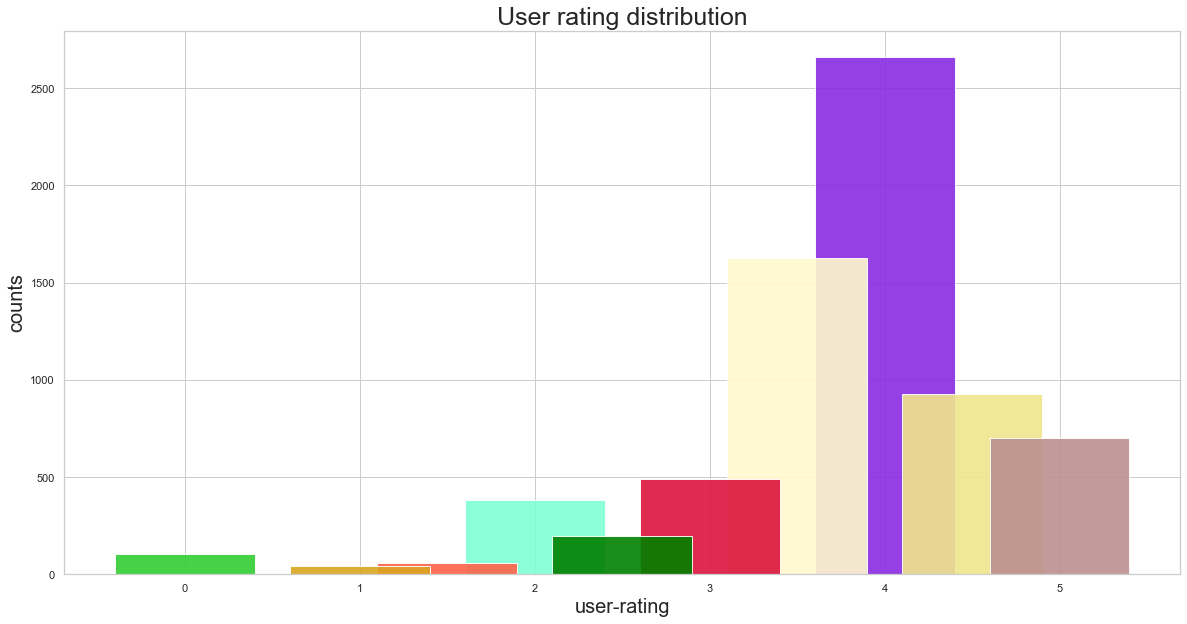

In [37]:
fig = plt.figure(figsize=(20, 10))
plt.bar(df['user_rating'].unique(),df['user_rating'].value_counts(),align='center', alpha=0.9,color=np.random.choice(list(mcolors.CSS4_COLORS.keys()), 10))
plt.title('User rating distribution',fontsize=25)
plt.ylabel('counts',fontsize=20)
plt.xlabel('user-rating',fontsize=20)
plt.savefig('plots/user-rating-dist')

# Matplotlib

In [38]:
labels = df['prime_genre'].unique()
print(type(labels))
sizes = []
for label in labels:
    sizes.append(df[df['prime_genre']==label].shape[0])
colors = np.random.choice(list(mcolors.CSS4_COLORS.keys()), 24)

<class 'numpy.ndarray'>


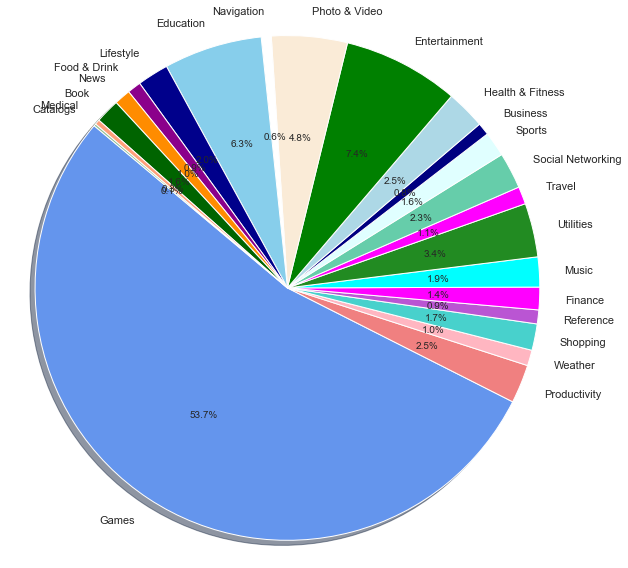

In [39]:

fig = plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()
fig.savefig('plots\pie_chart.png', dpi=fig.dpi)

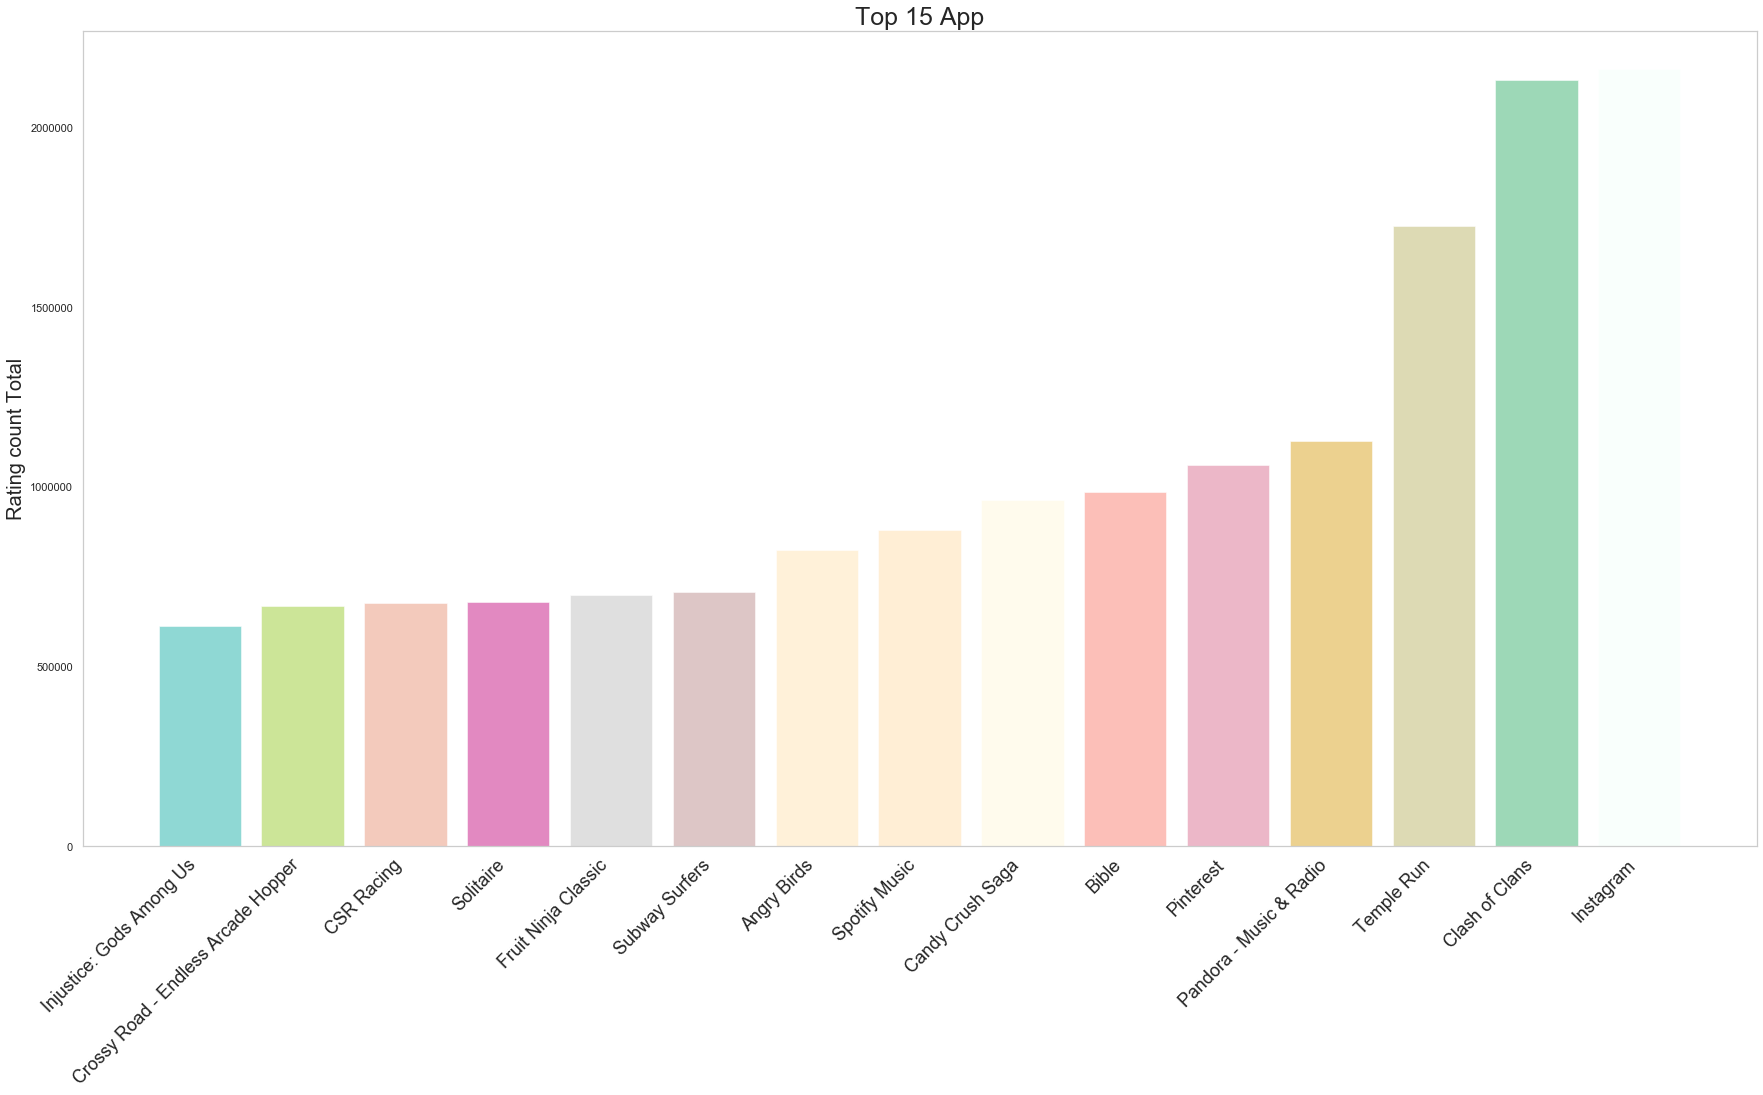

In [40]:
temp = df.iloc[df['rating_count_tot'].sort_values()[-16:-1].index]
fig = plt.figure(figsize=(30,15))
fig.add_subplot(111)
plt.grid()
plot = plt.bar(temp['track_name'],temp['rating_count_tot'], align='center', alpha=0.5,color=np.random.choice(list(mcolors.CSS4_COLORS.keys()), 15))
plt.xticks(np.arange(len(temp['track_name'])),temp['track_name'],rotation=45, ha="right",fontsize=18)
plt.ylabel('Rating count Total',fontsize=20)
plt.title('Top 15 App',fontsize=25)
plt.savefig('plots/Top 15 App.png')

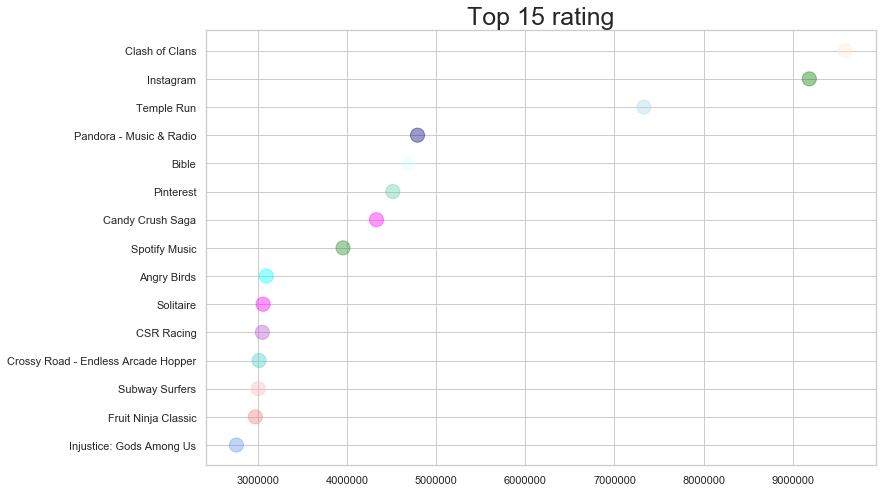

In [64]:
plt.figure(figsize=(12, 8))
ratio = {}
ratio['rate'] = ((df['user_rating']+df['user_rating_ver'])/2.0)*df['rating_count_tot']
ratio['rate'] = ratio['rate'].sort_values()
ratio['name'] = df.iloc[ratio['rate'].index]['track_name']
filter_df = pd.DataFrame(ratio)
filter_df = filter_df[-16:-1]
#sns.factorplot(y='rate',data=filter_df[-16:-1],kind="swarm",palette='rainbow')
plt.scatter(filter_df['rate'], filter_df['name'], c=colors[:15], alpha=0.4,cmap='viridis',s=200)
plt.title("Top 15 rating",fontsize=25)
plt.savefig('plots\scatter-plots-top-15-rating')

In [42]:
#the primirive way...
'''
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.bar(df['lang.num'], df['rating_count_tot'])
plt.subplot(132)
plt.scatter(df['lang.num'], df['rating_count_tot'])
plt.title('rating count over language number')
plt.savefig('plots/one-grid-two-plots')
plt.show()
'''

"\nplt.figure(figsize=(15, 15))\n\nplt.subplot(131)\nplt.bar(df['lang.num'], df['rating_count_tot'])\nplt.subplot(132)\nplt.scatter(df['lang.num'], df['rating_count_tot'])\nplt.title('rating count over language number')\nplt.savefig('plots/one-grid-two-plots')\nplt.show()\n"

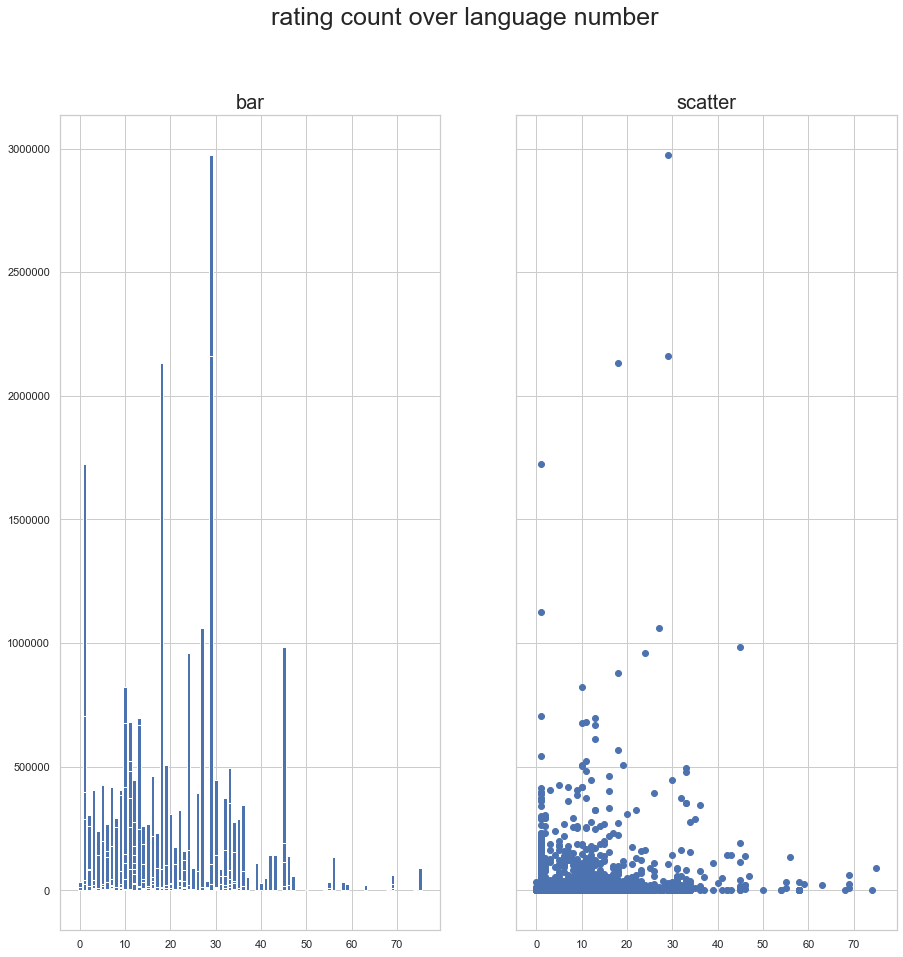

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,15))
fig.suptitle("rating count over language number", fontsize=25)
axes[0].bar(df['lang.num'], df['rating_count_tot'])
axes[0].set_title("bar",fontsize=20)
axes[1].scatter(df['lang.num'], df['rating_count_tot'])
axes[1].set_title("scatter",fontsize=20)
plt.savefig('plots/one-grid-two-plots')
plt.show()

In [44]:
'''


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(df['lang.num'], df['rating_count_tot'], bins=4, range=[[0,3], [0, 3]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
fig.savefig('plots/3Dhistogram.png')
plt.show()
'''

'\n\n\nfig = plt.figure()\nax = fig.add_subplot(111, projection=\'3d\')\nhist, xedges, yedges = np.histogram2d(df[\'lang.num\'], df[\'rating_count_tot\'], bins=4, range=[[0,3], [0, 3]])\n\nxpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")\nxpos = xpos.ravel()\nypos = ypos.ravel()\nzpos = 0\n\ndx = dy = 0.5 * np.ones_like(zpos)\ndz = hist.ravel()\n\nax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=\'b\', zsort=\'average\')\nfig.savefig(\'plots/3Dhistogram.png\')\nplt.show()\n'

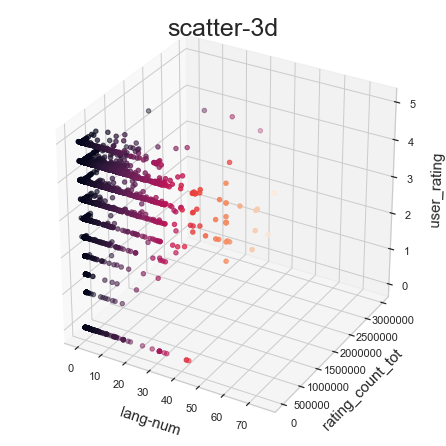

In [45]:
fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = df['lang.num']
y = df['rating_count_tot']
z = df['user_rating']


ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('lang-num',labelpad=10,fontsize=15)
ax.set_ylabel('rating_count_tot',labelpad=10,fontsize=15)
ax.set_zlabel('user_rating',labelpad=10,fontsize=15)
ax.set_title('scatter-3d',fontsize=25)
plt.savefig('plots\scatter-plot-3d')
plt.show()

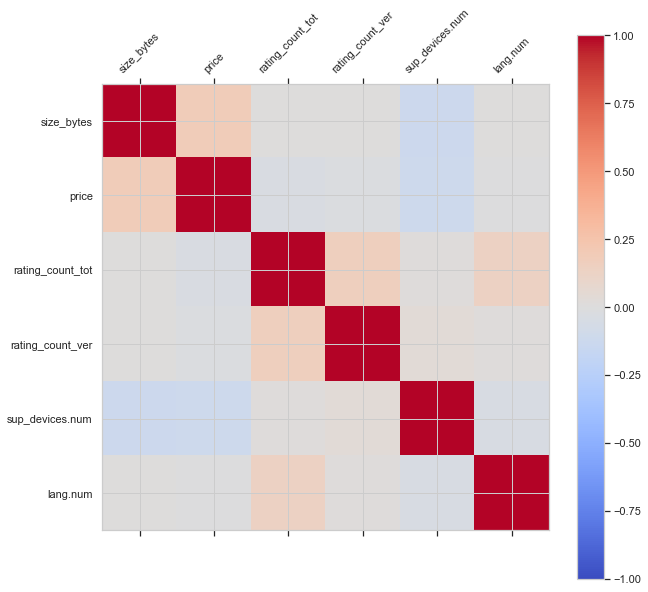

In [46]:
data = df[['size_bytes','price','rating_count_tot','rating_count_ver','sup_devices.num','lang.num']]#take only the numeric values
corr = data.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=45)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.savefig("plots/heatmap_correlation")
plt.show()
#anther way to do the same in seaborn:
#ax = sns.heatmap(df.corr(), linewidth=0.5)

In [47]:
#from mpl_finance import candlestick_ohlc
#fig, ax1 = plt.subplots()

# Seaborn

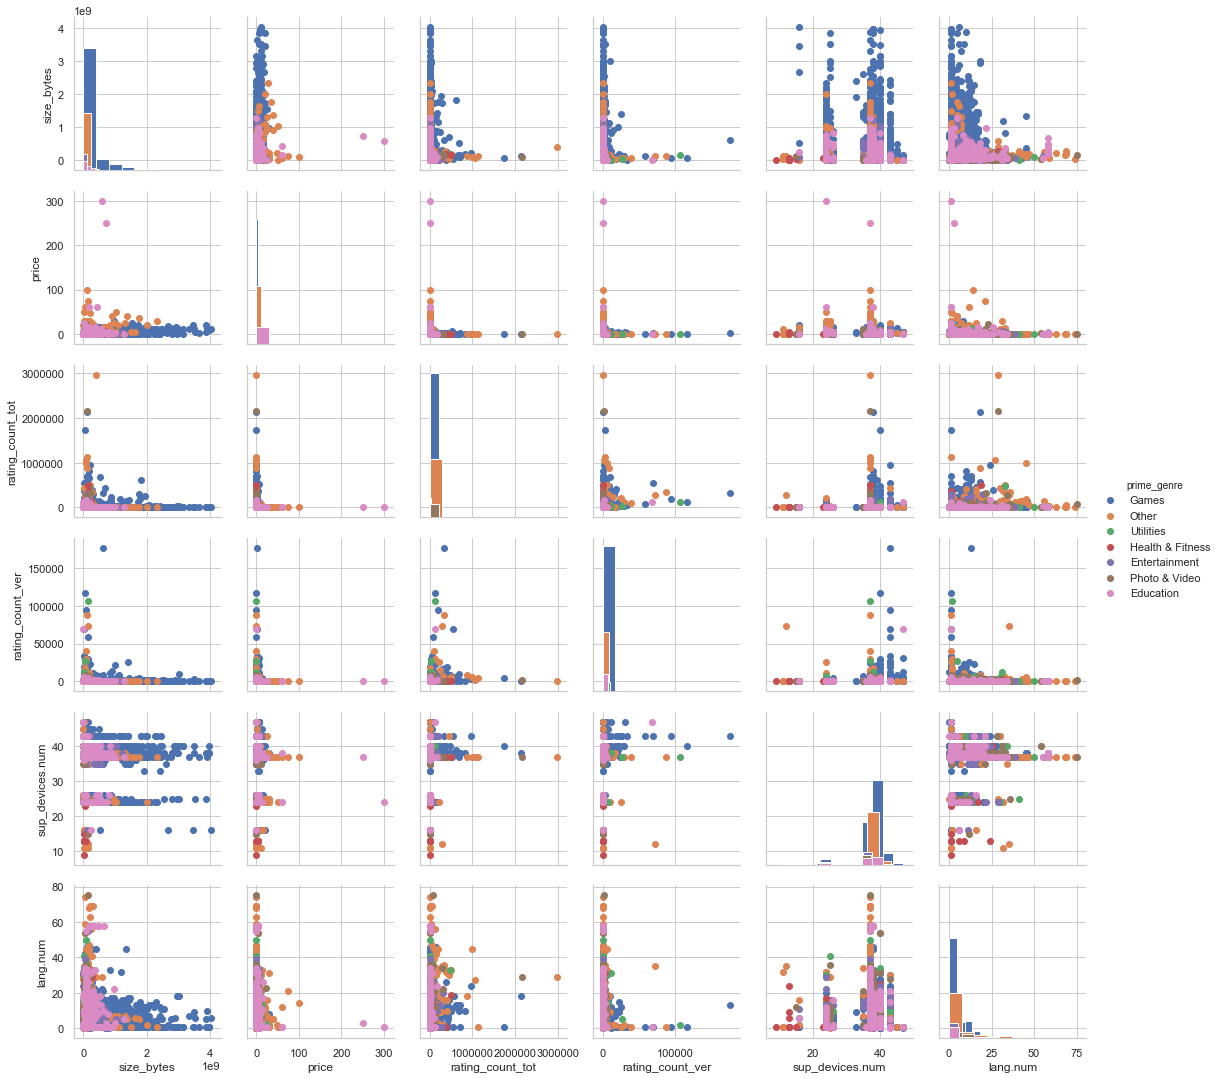

In [48]:
#plot = sns.jointplot(x='rating_count_ver',y='rating_count_tot', data=df)
df_copy = df.copy()
sizes = np.array(sizes)
sizes = sizes/sum(sizes)
labels = df_copy['prime_genre'].unique()
for i in range(len(labels)):
    if sizes[i]<0.025:
        df_copy.loc[df_copy['prime_genre']==labels[i],'prime_genre'] = 'Other'
g = sns.PairGrid(data=df_copy[['size_bytes','price','rating_count_tot','rating_count_ver','sup_devices.num','lang.num','prime_genre']], hue='prime_genre')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
g.savefig("plots/user_rating.png")

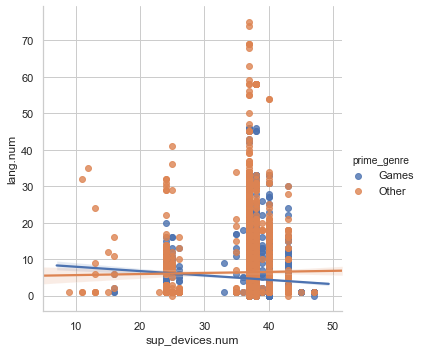

In [49]:
df_copy = df.copy()
df_copy.loc[df_copy['prime_genre']!='Games','prime_genre'] = 'Other'
plot = sns.lmplot(x = 'sup_devices.num',y = 'lang.num',data = df_copy,hue = 'prime_genre')
plot.savefig("plots\games-free-costs.png")

<Figure size 7200x7200 with 0 Axes>

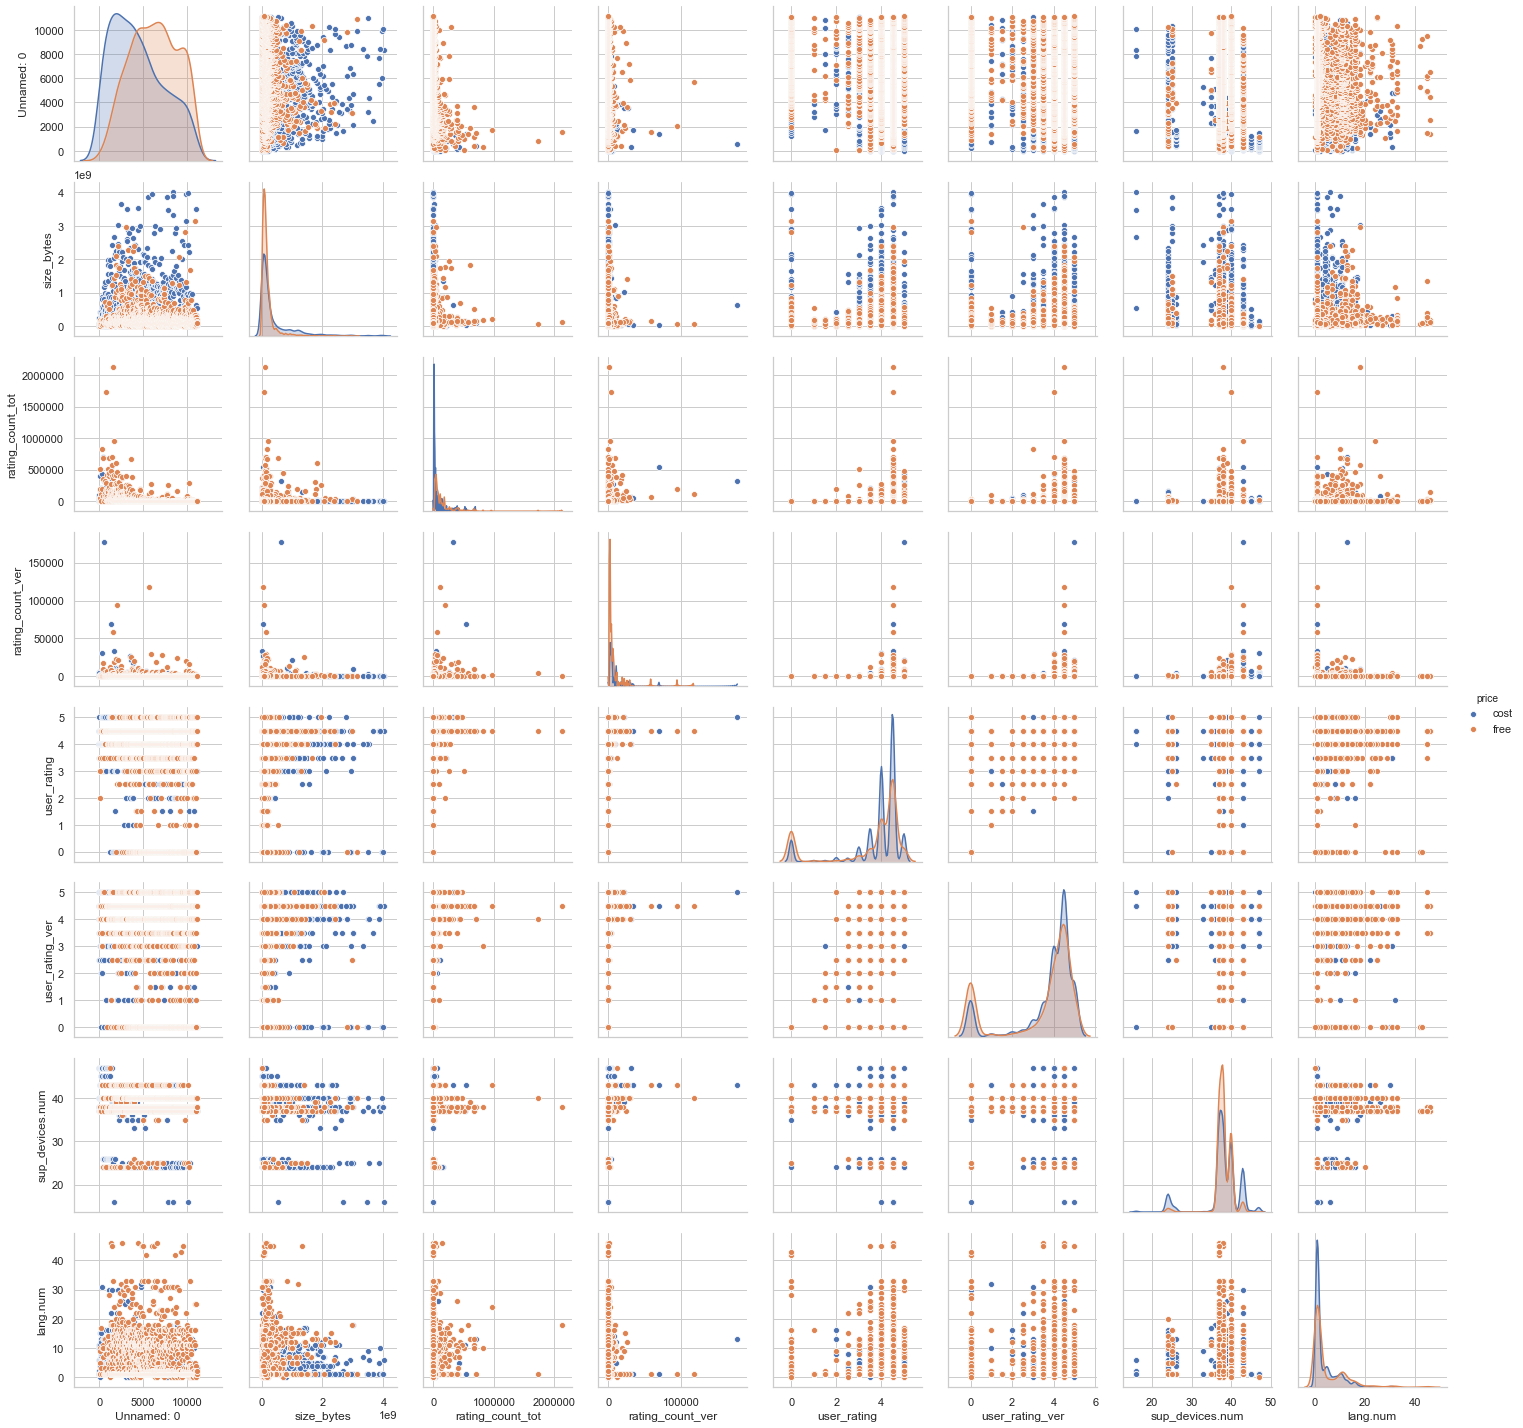

In [50]:
df_copy = df.copy()
df_copy = df_copy[df_copy['prime_genre']=='Games']
df_copy.loc[df_copy['price']!=0,'price'] = 'cost'
df_copy.loc[df_copy['price']==0,'price'] = 'free'
plt.figure(figsize=(100,100))
sns_plot = sns.pairplot(df_copy[df_copy['prime_genre']=='Games'],hue='price')
sns_plot.savefig("plots\pair_plot.png")

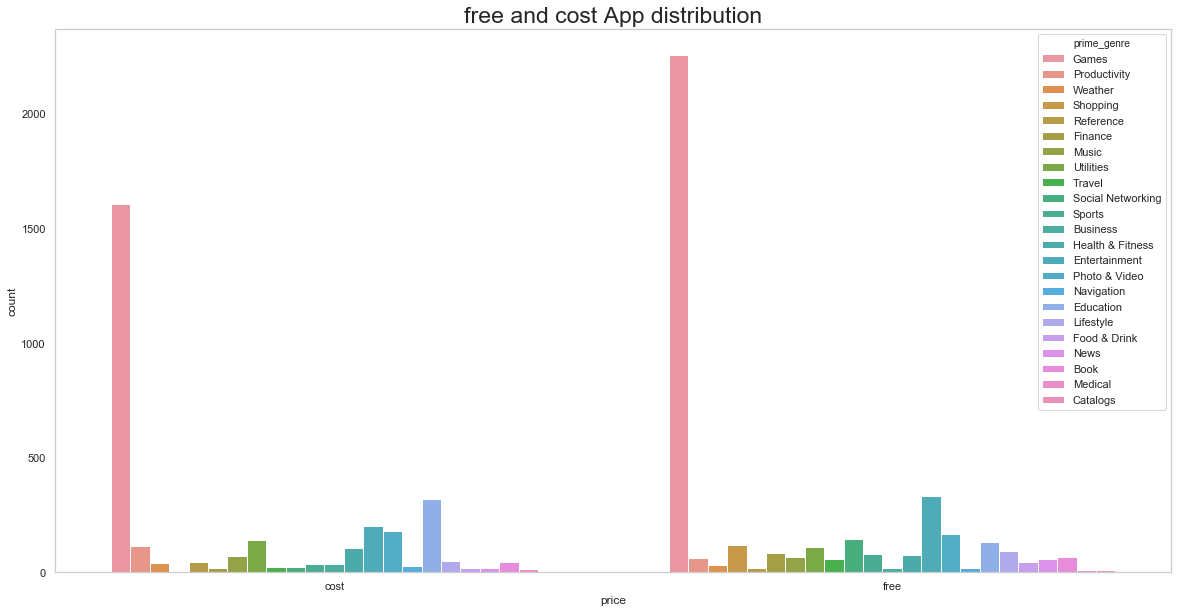

In [51]:
df_copy = df.copy()
#df_copy.loc[df['prime_genre']!='Games','prime_genre']='Other'
df_copy.loc[df_copy['price']!=0,'price'] = 'cost'
df_copy.loc[df_copy['price']==0,'price'] = 'free'
plt.figure(figsize=(20,10))
plt.grid()
plot = sns.countplot(x='price',data=df_copy,hue="prime_genre")
plot.set_title('free and cost App distribution',fontsize=23)
plot.get_figure().savefig("plots/free-cost.png")

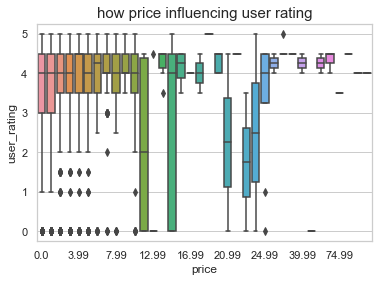

In [52]:
sns.set(style='whitegrid')
plot = sns.boxplot( y=df["user_rating"],x=df['price'])
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plot.set_title("how price influencing user rating",fontsize=15)
plot.get_figure().savefig('plots/box-plot-user-rating-by-price')

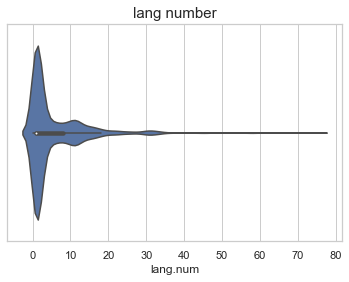

In [53]:
sns_plot = sns.violinplot(x=df['lang.num'])
sns_plot.set_title("lang number",fontsize=15)
sns_plot.get_figure().savefig("plots/vilonplot.png")

<Figure size 1584x576 with 0 Axes>

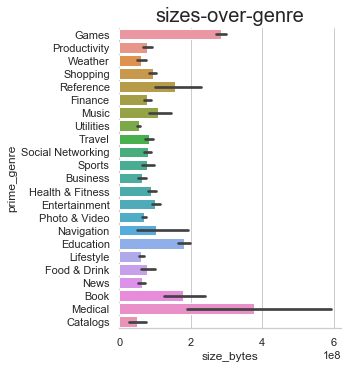

In [54]:
plt.figure(figsize=(22,8))
plot = sns.catplot(x="size_bytes", y="prime_genre", data=df[['size_bytes','prime_genre']], kind="bar")
plot.despine(left=True)
plt.gca().set_title("sizes-over-genre",fontsize=20)
plot.savefig('plots/sizes-over-genre')

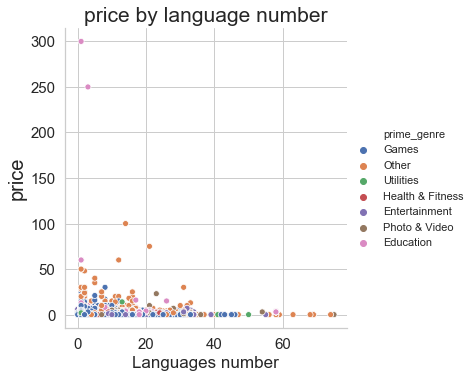

In [55]:
df_copy = df.copy()
sizes = np.array(sizes)
sizes = sizes/sum(sizes)
labels = df_copy['prime_genre'].unique()
for i in range(len(labels)):
    if sizes[i]<0.025:
        df_copy.loc[df_copy['prime_genre']==labels[i],'prime_genre'] = 'Other'
plot = sns.relplot(x="lang.num", y="price",data=df_copy,hue='prime_genre')
plt.gca().set_title('price by language number',fontsize=21)
plt.gca().set_xlabel("Languages number",fontsize=17)
plt.gca().set_ylabel("price",fontsize=20)
plt.gca().tick_params(labelsize=15)
plot.savefig("plots/scatter-price by lang number")

In [ ]:
#ax = sns.swarmplot(x="sup_devices.num", y="price", data=df_copy)